## What are the groups, that suffered most

We tried the variables connected to the age  groups and the level of urbanisation.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import iqr
import seaborn as sns



In [11]:
df = pd.read_csv(r'C:/Users/arimi/Documents/brush up/my_env/conda-meta/COVID19_state.csv')
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                51 non-null     object 
 1   Tested               51 non-null     int64  
 2   Infected             51 non-null     int64  
 3   Deaths               51 non-null     int64  
 4   Population           51 non-null     int64  
 5   Pop Density          51 non-null     float64
 6   Gini                 51 non-null     float64
 7   ICU Beds             51 non-null     int64  
 8   Income               51 non-null     int64  
 9   GDP                  51 non-null     int64  
 10  Unemployment         51 non-null     float64
 11  Sex Ratio            51 non-null     float64
 12  Smoking Rate         51 non-null     float64
 13  Flu Deaths           51 non-null     float64
 14  Respiratory Deaths   51 non-null     float64
 15  Physicians           51 non-null     int64

In [13]:
df.describe()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+
count,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.904946e+06,179626.666667,4357.745098,6.496451e+06,431.560508,0.466165,1466.411765,51597.607843,61497.333333,3.515686,...,19711.666667,101.921569,8332.156863,7.413725,1.215686,51.999020,74.107843,0.323529,0.376471,0.299020
std,3.590449e+06,208077.881595,5637.548491,7.450657e+06,1647.225920,0.023455,1562.124594,8224.387459,22648.274324,0.831233,...,22532.917088,88.881909,1256.751246,1.457535,1.758564,8.627992,14.885481,0.027116,0.019680,0.030936
min,1.340180e+05,2219.000000,58.000000,5.670250e+05,1.286300,0.406300,94.000000,37994.000000,37948.000000,2.200000,...,1172.000000,7.000000,5982.000000,4.400000,0.000000,26.600000,38.700000,0.260000,0.350000,0.210000
25%,8.216280e+05,46623.500000,650.500000,1.802113e+06,50.604850,0.452050,327.000000,45981.000000,51156.000000,2.850000,...,5656.000000,44.500000,7390.000000,6.650000,0.000000,45.300000,65.400000,0.305000,0.370000,0.290000
50%,1.792602e+06,120865.000000,2113.000000,4.499692e+06,108.049700,0.468000,1134.000000,49417.000000,57492.000000,3.400000,...,12205.000000,89.000000,8107.000000,7.400000,1.000000,51.700000,74.200000,0.320000,0.370000,0.300000
75%,3.403572e+06,208161.000000,4983.500000,7.587794e+06,223.983100,0.479500,1841.500000,56610.000000,65971.500000,3.800000,...,23991.500000,129.500000,9095.500000,8.150000,1.000000,58.300000,87.550000,0.340000,0.385000,0.310000
max,1.891250e+07,930628.000000,25838.000000,3.993749e+07,11814.541000,0.542000,7338.000000,74561.000000,200277.000000,5.800000,...,112906.000000,523.000000,11944.000000,12.800000,9.000000,70.700000,100.000000,0.420000,0.480000,0.370000


In [14]:
# Calculate the correlation between number of effected and deaths
df['Infected'].corr(df['Deaths'])

0.8441197182278773

In [15]:
# Add the column, which shows the share of deaths in the total amount of infected
df['Ratio of deaths over infected'] = df['Deaths']/df['Infected']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Health Spending  Pollution  \
0       119   59687  73205  ...            11064        6.4   
1      1533   42334  45219  ...             7281        8.1   
2       732   42566  42454  ...             7408        7.1   
3      1559   43650  48055  ...             6452        9.7   
4      7338   62586  74205  ...             7549       12.8   

   Med-Large Airports  Temperature  Urban  Age 0-25  Age 26-54  Age 55+  \
0                 1.0         26.6   66.0      0.36       0.39     0.25   
1 

## Covid effects in urban and rural areas

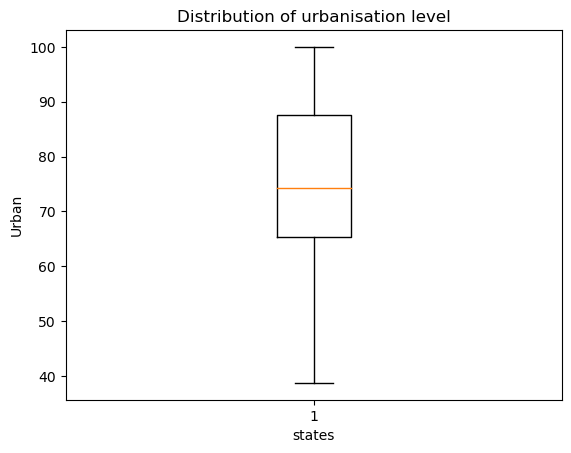

In [16]:
# Plot the distribution of the values in Urban column
fig, ax = plt.subplots()
ax.boxplot(df['Urban'])
ax.set_xlabel('states')
ax.set_ylabel('Urban')
ax.set_title('Distribution of urbanisation level')
plt.show()

There are no outliers.

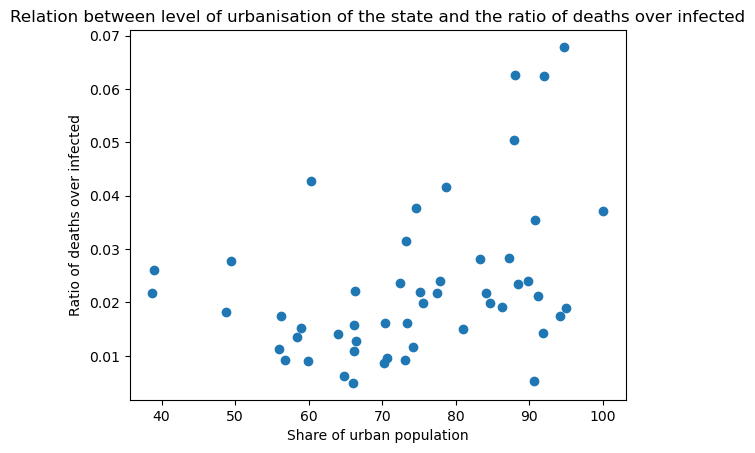

In [17]:
# Plot relations between level of urbanisation and ratio of deaths over infected
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Ratio of deaths over infected'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between level of urbanisation of the state and the ratio of deaths over infected')
plt.show()

In [18]:
# Calculate correlation between level of urbanisation and ratio of deaths over infected
df['Urban'].corr(df['Ratio of deaths over infected'])

0.3718027102504939

Higher level of urbanisation is related to the higher level of deaths over infected.

In [19]:
# Follow the same procedure for the 75% of values. Drop all the rows, if level of urbanisation < 87
df_less_urban = df[df['Urban'] < 87]

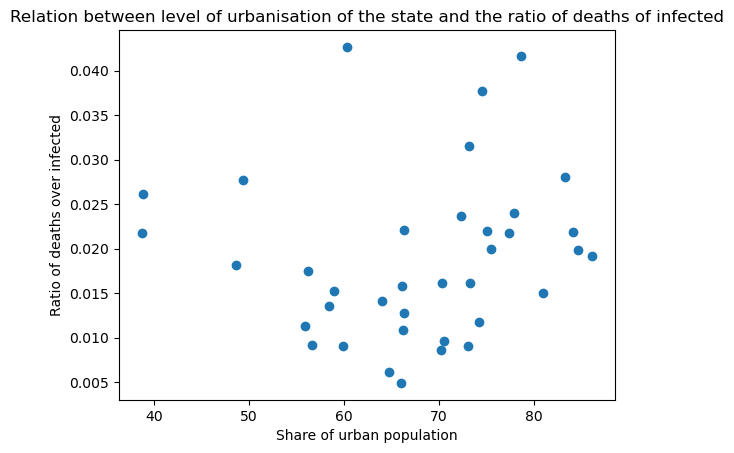

In [20]:
# Plot relations between level of urbanisation and ratio of deaths over infected for less urbanised states only
fig, ax = plt.subplots()
ax.scatter(df_less_urban['Urban'], df_less_urban['Ratio of deaths over infected'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between level of urbanisation of the state and the ratio of deaths of infected')
plt.show()

In [21]:
# Calculate correlation between level of urbanisation and ratio of deaths over infected for less urbanised states
df_less_urban['Urban'].corr(df_less_urban['Ratio of deaths over infected'])

0.10843366053075751

For less urbanised states correlation still exists, but it's quite low.

General overview: correlation between level of urbanisation and ratio of deaths over infected is positive (means, the higher is the level of urbanisation, the higher is the number of deaths over the whole number of infected). Still, it's moderate. Probably, because it's biased: i assume, that the higher level of urbanisation, the higher is the level of infected over the whole population (cause the cities are just more crowded). But, on the other hand, i assume, that the is higher the level of urbanisation, the lower is the level of deaths over the whole population (cause of the level of medicine and (needs to be proven as well) the accessibility to ICU beds).

In [22]:
# Add the columns, which shows the share of deaths/infected in the whole population
df['Infected over population'] = df['Infected']*df['Population']
df['Deaths over population'] = df['Deaths']*df['Population']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Med-Large Airports  Temperature  Urban  \
0       119   59687  73205  ...                 1.0         26.6   66.0   
1      1533   42334  45219  ...                 1.0         62.8   59.0   
2       732   42566  42454  ...                 0.0         60.4   56.2   
3      1559   43650  48055  ...                 1.0         60.3   89.8   
4      7338   62586  74205  ...                 9.0         59.4   95.0   

   Age 0-25  Age 26-54  Age 55+  School Closure Date  \
0      0.36       0.39  

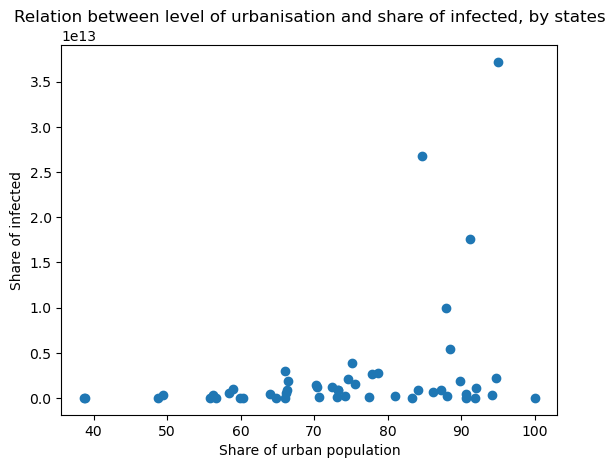

In [23]:
# Plot relations between level of urbanisation and number of infected as a share of total population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Infected over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Share of infected')
ax.set_title('Relation between level of urbanisation and share of infected, by states')
plt.show()

In [24]:
# Calculate correlation level of urbanisation and number of infected as a share of total population of the state
df['Urban'].corr(df['Infected over population'])

0.32780528503716

Higher is level of urbanisation, more people are getting affected. Level of correlation is also moderate.

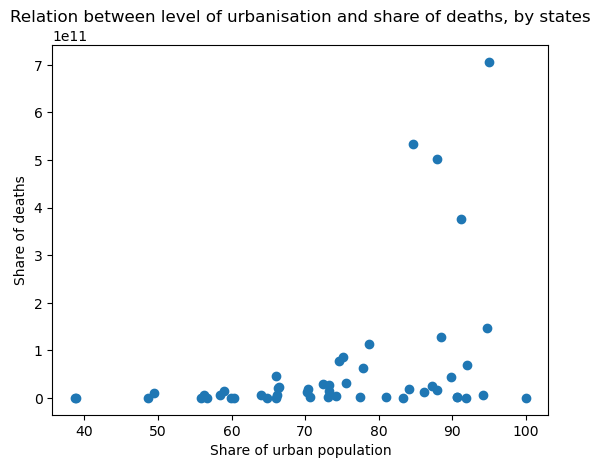

In [25]:
# Plot relations between level of urbanisation and number of deaths as a share of total population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Deaths over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Share of deaths')
ax.set_title('Relation between level of urbanisation and share of deaths, by states')
plt.show()

In [26]:
# Calculate correlation between level of urbanisation and number of infected as a share of total population of the state
df['Urban'].corr(df['Deaths over population'])

0.37717210048980826

Higher is level of urbanisation, more people are getting affected. Correlation is moderate as well.
NB the sign is surprising to me, i assumed, that death rate should be higher in the more rural areas because of lack of medicine and number of ICU beds.

In [27]:
# Add the column, which shows the level of accessibility of ICU beds for population
df['Ratio of ICU beds over population'] = df['ICU Beds']/df['Population']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Temperature  Urban  Age 0-25  Age 26-54  \
0       119   59687  73205  ...         26.6   66.0      0.36       0.39   
1      1533   42334  45219  ...         62.8   59.0      0.33       0.37   
2       732   42566  42454  ...         60.4   56.2      0.34       0.37   
3      1559   43650  48055  ...         60.3   89.8      0.33       0.36   
4      7338   62586  74205  ...         59.4   95.0      0.33       0.40   

   Age 55+  School Closure Date  Ratio of deaths over infected  \
0     0.

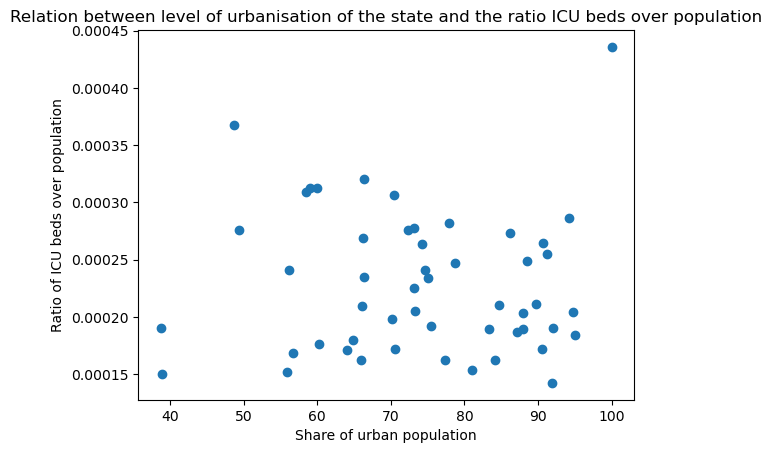

In [28]:
# Plot relations between level of urbanisation and ratio of ICU beds over population of the state
fig, ax = plt.subplots()
ax.scatter(df['Urban'], df['Ratio of ICU beds over population'])
ax.set_xlabel('Share of urban population')
ax.set_ylabel('Ratio of ICU beds over population')
ax.set_title('Relation between level of urbanisation of the state and the ratio ICU beds over population')
plt.show()

In [29]:
# Plot relations between level of urbanisation and ratio of ICU beds over population of the state
df['Urban'].corr(df['Ratio of ICU beds over population'])

-0.008553038533163816

There is very weak and negative correlation. We can not say anything about the relations between level of urbanisation of the state and the accessability to the ICU beds. Seems, all states are provided with ICU beds kind of equally.

## Relation between sex ratio and the ratio of deaths over infected

Defining the sex ratio as the ratio of the number of males to the number of females in a population. A sex ratio of 1.054688 would suggest that, on average, there are approximately 1.05 males for every female in the population. In that sense, a value below 1 indicates more females and a value above 1 indicates more males. As we can see from the mean of the 'Sex Ratio' column, there is more women than male in a 0.96 mean. As well, the correlation as we can see is strongly negative with a -0.49 value. This means that when the sex ratio decreases, the female population increases and most of the deaths are probably going to be women.

In [30]:
df['Sex Ratio'].describe()

count    51.000000
mean      0.963721
std       0.031868
min       0.888570
25%       0.942516
50%       0.958850
75%       0.982687
max       1.054688
Name: Sex Ratio, dtype: float64

In [51]:
df_less_urban['Sex Ratio'].corr(df_less_urban['Ratio of deaths over infected'])

-0.48827374873174345

## The effects of COVID for different age groups

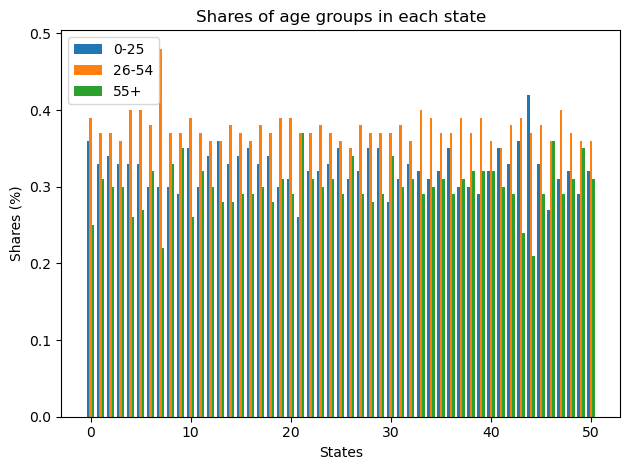

In [32]:
# Plot the shares of different age groups for each state
x = np.arange(len(df['State']))
fig, ax = plt.subplots()
bar_width = 0.25
ax.bar(x - bar_width, df['Age 0-25'], bar_width, label='0-25')
ax.bar(x, df['Age 26-54'], bar_width, label='26-54')
ax.bar(x + bar_width, df['Age 55+'], bar_width, label='55+')
#plt.xticks(x, df['State'])
plt.xlabel('States')
plt.ylabel('Shares (%)')
plt.title('Shares of age groups in each state')
plt.legend()
plt.tight_layout()
plt.show()

For the majority of states the share od middle age groups is higher, than other two.

In [33]:
# Check the correlation between age group and level of infected over population
print(df['Age 0-25'].corr(df['Infected over population']))
print(df['Age 26-54'].corr(df['Infected over population']))
print(df['Age 55+'].corr(df['Infected over population']))

0.06714346950330365
0.19315362922509002
-0.22620970855484673


In [34]:
# Check the correlation between age group and level of deaths over population
print(df['Age 0-25'].corr(df['Deaths over population']))
print(df['Age 26-54'].corr(df['Deaths over population']))
print(df['Age 55+'].corr(df['Deaths over population']))

0.011801635448012477
0.20408639368319267
-0.18567161939096533


For young and middle age group in both cases, the higher is the age group share, the higher is the level of infected/dead over population. For the old group the relations are negative. Still, the correlation coefficients are very low. 

In [35]:
# Check the correlation between age group and level of death rate for infected people
print(df['Age 0-25'].corr(df['Ratio of deaths over infected']))
print(df['Age 26-54'].corr(df['Ratio of deaths over infected']))
print(df['Age 55+'].corr(df['Ratio of deaths over infected']))

-0.4710001071841439
0.262672971532891
0.18961852023483783


In this case, the higher share of young group, the lower level of deaths/infected. Correlation is moderate.
For other two groups the answer shall be quite th oposite and correlation is weaker.
The main problem here is the fact, that we don't know the ratio of deaths/infected over population for particular age groups separately. WIth the understanding, that the share of middle age group is constantly higher than for other two, i assume, that it translates most of the effect.
In this case, we need to come with some age index for every state (one value per state).

To build the following index we assign coefficient = 1 to a young group (0-25), coefficient = 2 to a middle age group (26-54) and coefficient = 3 to an old group (55+), then we weight it according to the share of each group in the population of the state. The age index itself is a sum of three coefficients weighted.

In [36]:
# Create an age index with the "weighted" values for each age group
df['Age 0-25, weighted'] = df['Age 0-25']*1
df['Age 26-54, weighted'] = df['Age 26-54']*2
df['Age 55+, weighted'] = df['Age 55+']*3
df['Age index'] = df['Age 0-25, weighted'] + df['Age 26-54, weighted'] + df['Age 55+, weighted']
print(df.head())

        State    Tested  Infected  Deaths  Population  Pop Density    Gini  \
0      Alaska    620170     17057      84      734002       1.2863  0.4081   
1     Alabama   1356420    194892    2973     4908621      96.9221  0.4847   
2    Arkansas   1363429    113641    1985     3038999      58.4030  0.4719   
3     Arizona   1792602    248139    5982     7378494      64.9550  0.4713   
4  California  18912501    930628   17672    39937489     256.3727  0.4899   

   ICU Beds  Income    GDP  ...  Age 55+  School Closure Date  \
0       119   59687  73205  ...     0.25             03/19/20   
1      1533   42334  45219  ...     0.31             03/16/20   
2       732   42566  42454  ...     0.30             03/17/20   
3      1559   43650  48055  ...     0.30             03/16/20   
4      7338   62586  74205  ...     0.26             03/19/20   

   Ratio of deaths over infected  Infected over population  \
0                       0.004925               12519872114   
1               

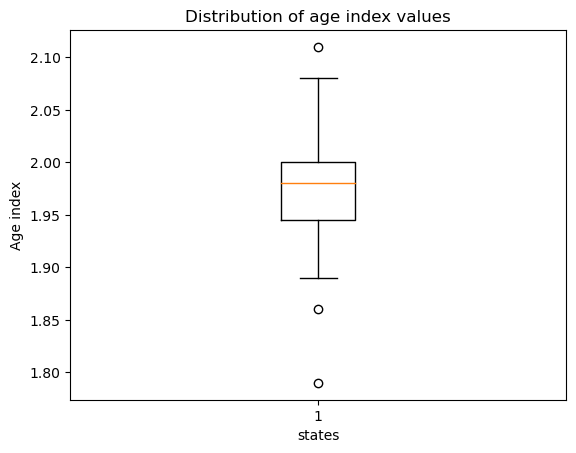

In [37]:
# Plot the distribution of the values of age index
fig, ax = plt.subplots()
ax.boxplot(df['Age index'])
ax.set_xlabel('states')
ax.set_ylabel('Age index')
ax.set_title('Distribution of age index values')
plt.show()

In [38]:
# Calculate outliers for age index
# NB I don't know why it doesn't run sometimes, but we don't actually need to remove outliers, so we can easily skip it
df['Age index'].median()
#iqr = iqr(df['Age index'])
q1 = df['Age index'].quantile(0.25)
q3 = df['Age index'].quantile(0.75)
iqr = q3 - q1
lower_threshhold = np.quantile(df['Age index'], 0.25) - 1.5 * iqr
upper_threshhold = np.quantile(df['Age index'], 0.75) + 1.5 * iqr
df_lower = df[df['Age index'] <= lower_threshhold]
print(df_lower)
df_upper = df[df['Age index'] >= upper_threshhold]
print(df_upper)

    State   Tested  Infected  Deaths  Population  Pop Density    Gini  \
43  Texas  8291703    909257   18097    29472295     112.8204  0.4800   
44   Utah  1410145    117706     614     3282115      39.9430  0.4063   

    ICU Beds  Income    GDP  ...  Age 55+  School Closure Date  \
43      6199   49161  61167  ...     0.24             03/23/20   
44       565   45340  55550  ...     0.21             03/16/20   

    Ratio of deaths over infected  Infected over population  \
43                       0.019903            26797890534815   
44                       0.005216              386324628190   

    Deaths over population  Ratio of ICU beds over population  \
43            533360122615                           0.000210   
44              2015218610                           0.000172   

    Age 0-25, weighted  Age 26-54, weighted  Age 55+, weighted  Age index  
43                0.36                 0.78               0.72       1.86  
44                0.42                 0.74

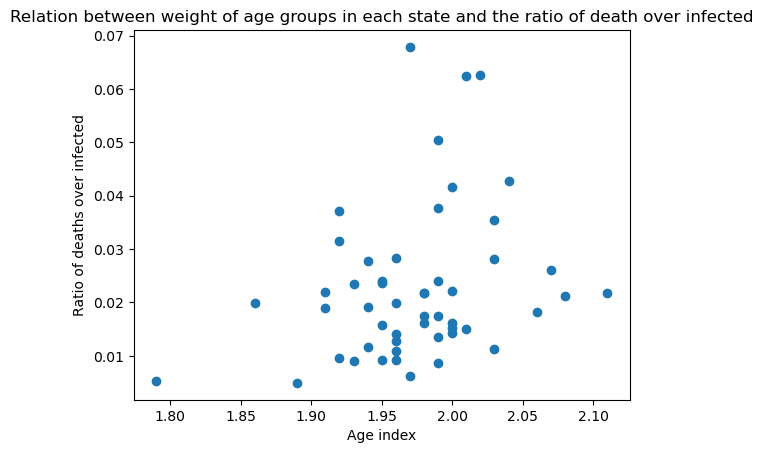

In [39]:
# Plot relations between age index and ratio of death over infected
fig, ax = plt.subplots()
ax.scatter(df['Age index'], df['Ratio of deaths over infected'])
ax.set_xlabel('Age index')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between weight of age groups in each state and the ratio of death over infected')
plt.show()

In [40]:
# Calculate correlations between age index and ratio of death over infected, as well as number of infected/deaths as a share of the whole population of the state
print(df['Age index'].corr(df['Ratio of deaths over infected']))
print(df['Age index'].corr(df['Infected over population']))
print(df['Age index'].corr(df['Deaths over population']))

0.27543865146209473
-0.21015895255656017
-0.16126671110757862


For "older" states the death rate of infected is higher, but in te opposite way, the shares of infected/deaths in the whole population for the "older" states are lower. Anyway, the correlations are quite weak, so we can not state, there are particular relations.
NB I guess, we can leave just the first one. Even considering the fact, that correlation is not strong, it's easier to interpret. The reason for a weak correlation is the simplicity of weithening approach and the low variance of the index. Probably, shall come with some more sophisticated ideas.

In [41]:
# Remove outliers
df_without_outliers = df[(df['Age index'] > 1.79) & (df['Age index'] <= 2.11)]

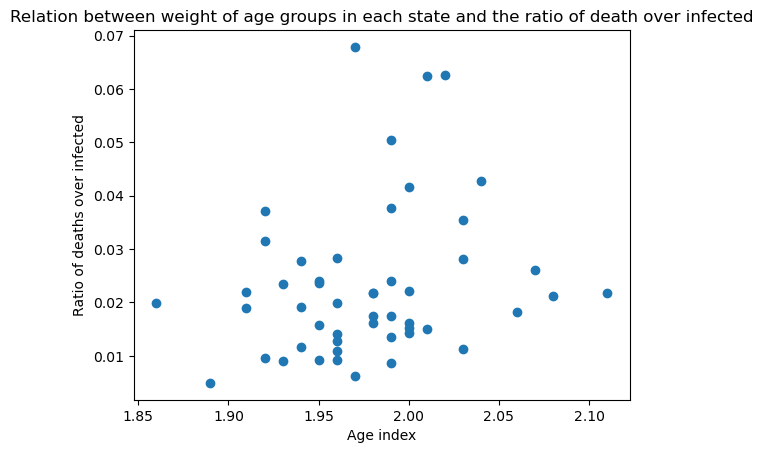

In [42]:
# Plot relations between age index and ratio of death over infected for the dataset without "outlier" states
fig, ax = plt.subplots()
ax.scatter(df_without_outliers['Age index'], df_without_outliers['Ratio of deaths over infected'])
ax.set_xlabel('Age index')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between weight of age groups in each state and the ratio of death over infected')
plt.show()

In [43]:
# Calculate correlations between age index and ratio of death over infected, as well as number of infected/deaths as a share of the whole population of the state
print(df_without_outliers['Age index'].corr(df_without_outliers['Ratio of deaths over infected']))
print(df_without_outliers['Age index'].corr(df_without_outliers['Infected over population']))
print(df_without_outliers['Age index'].corr(df_without_outliers['Deaths over population']))

0.22216042894882695
-0.26502164797543476
-0.2162191316178204


The level of correlations for the dataset without age outliers is quite the same as in the case with outliers. Both in terms of sign and significance.

## Affects of COVID on smokers and non-smokers

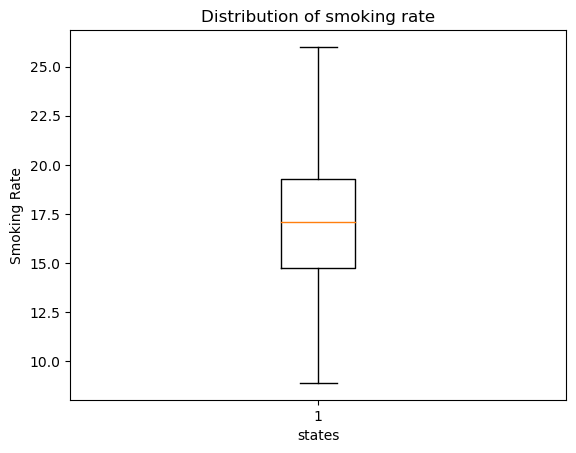

In [44]:
# Plot the distribution of the values in Smoking Rate column column
fig, ax = plt.subplots()
ax.boxplot(df['Smoking Rate'])
ax.set_xlabel('states')
ax.set_ylabel('Smoking Rate')
ax.set_title('Distribution of smoking rate')
plt.show()

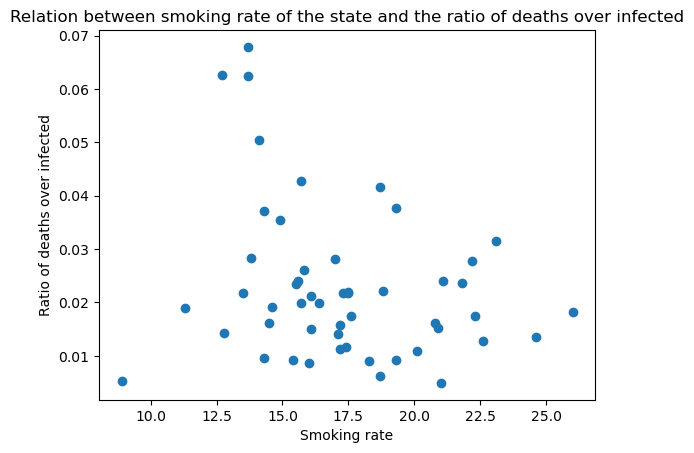

In [45]:
# Plot relations between level of urbanisation and ratio of deaths over infected
fig, ax = plt.subplots()
ax.scatter(df['Smoking Rate'], df['Ratio of deaths over infected'])
ax.set_xlabel('Smoking rate')
ax.set_ylabel('Ratio of deaths over infected')
ax.set_title('Relation between smoking rate of the state and the ratio of deaths over infected')
plt.show()

In [46]:
# Calculate correlation between smoking rate and ratio of deaths over infected,as well as as well as number of infected/deaths as a share of the whole population of the state
print(df['Smoking Rate'].corr(df['Ratio of deaths over infected']))
print(df['Smoking Rate'].corr(df['Infected over population']))
print(df['Smoking Rate'].corr(df['Deaths over population']))

-0.2502532295028208
-0.2579044479417398
-0.2853849277875387


The level of correlation is not very high, but it shows that the higher smoking rate is, the lower ratio od death for infected people. The same can be said about the relation between smoking rate and shares of infected/deaths over population.
NB it sound weird anyway, i can not interpret it really.

## Matrix of correlations

In [47]:
# Drop columns which can not be correlated
df1 = df.drop(columns=['State','School Closure Date', 'Infected', 'Deaths', 'Population', 'ICU Beds', 'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Hospitals', 'Med-Large Airports', 'Tested', 'adultInf', 'youngInf', 'seniorInf', ])

KeyError: "['adultInf', 'youngInf', 'seniorInf'] not found in axis"

In [ ]:
# Check all the correlations possible
correlation_matrix1 = df1.corr()
print(correlation_matrix1)

                                   Pop Density      Gini    Income       GDP  \
Pop Density                           1.000000  0.506948  0.019956  0.898326   
Gini                                  0.506948  1.000000  0.000428  0.390454   
Income                                0.019956  0.000428  1.000000  0.362317   
GDP                                   0.898326  0.390454  0.362317  1.000000   
Unemployment                          0.284099  0.311418 -0.138739  0.217973   
Sex Ratio                            -0.401153 -0.711993  0.132090 -0.212180   
Smoking Rate                         -0.174545  0.075545 -0.563845 -0.355842   
Health Spending                       0.460614  0.123952  0.456135  0.580269   
Pollution                             0.251578  0.412542 -0.131227  0.183789   
Temperature                           0.061071  0.469388 -0.362996 -0.127684   
Urban                                 0.326033  0.268066  0.425159  0.456731   
Age 0-25                             -0.

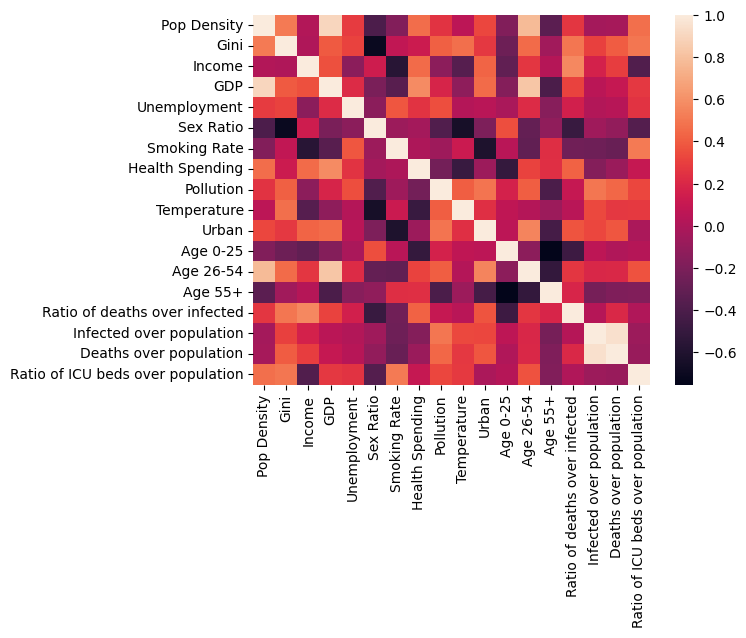

In [ ]:
# Map of correlation coefficients
ax = sns.heatmap(df1.corr())